# **Mini-Project Title: Intelligent Traffic Monitoring and Analysis System**

## **Overview**
This project focuses on building an intelligent system for monitoring and analyzing traffic using **computer vision** and **machine learning** techniques. With the increasing number of vehicles on the road, manual traffic monitoring is inefficient and error-prone. Automating this process using AI ensures scalability, accuracy, and real-time analysis.

---

## **Objective**
Develop a computer vision-powered system that monitors traffic, detects vehicles, estimates traffic density, and analyzes traffic patterns. The system will use techniques like **object detection**, **tracking**, and **video analysis** to provide actionable insights for traffic management.

---

## **Learning Outcomes**
1. Understand computer vision techniques like **object detection**, **tracking**, and **video analysis**.
2. Explore deep learning models such as **YOLO** and **OpenCV** for traffic monitoring.
3. Learn to preprocess and analyze video data for traffic density estimation.
4. Gain experience in deploying computer vision models for real-time applications.
5. Develop skills in visualizing and interpreting traffic data.

---

## **Step 1: Define the Problem**
### **Task:**
Understand the problem and its real-world implications. Automating traffic monitoring using computer vision can improve traffic management, reduce congestion, and enhance road safety.

### **Mini-task:**
Write a brief paragraph on how computer vision benefits traffic management systems.

**Example:**
Computer vision enables real-time monitoring of traffic by automatically detecting vehicles, estimating traffic density, and identifying anomalies like accidents or traffic jams. This automation reduces the need for manual intervention, improves response times, and provides data-driven insights for better traffic management.

---

## Data Collection
Task:
Collect video data of traffic scenes suitable for analysis. Publicly available datasets from Kaggle for this project.

Mini-task:
Download and load a suitable dataset for traffic monitoring.

In [1]:
from google.colab import files
files.upload()  # Upload your kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"enduranceogashi","key":"a92542c5f11fb39aab23814426625f62"}'}

In [2]:
# kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:

!kaggle datasets download -d shawon10/road-traffic-video-monitoring
!unzip road-traffic-video-monitoring.zip


Dataset URL: https://www.kaggle.com/datasets/shawon10/road-traffic-video-monitoring
License(s): unknown
  0% 0.00/46.4M [00:00<?, ?B/s]
100% 46.4M/46.4M [00:00<00:00, 1.31GB/s]
Archive:  road-traffic-video-monitoring.zip
  inflating: british_highway_traffic.mp4  
  inflating: dhaka_traffic.mp4       
  inflating: road_trafifc.mp4        
  inflating: traffic_detection.mp4   
  inflating: traffic_video.avi       


In [4]:
import cv2

cap = cv2.VideoCapture('british_highway_traffic.mp4')

if not cap.isOpened():
    print("Error: Could not open video.")
else:
    print("✅ Video loaded successfully.")


✅ Video loaded successfully.


In [8]:
cap

< cv2.VideoCapture 0x7f5ebd2a5530>

## Exploratory Data Analysis (EDA)

Analyze the video data to understand traffic patterns, vehicle types, and density. Extract key frames and visualize traffic scenes.

Visualize the distribution of vehicle types and traffic density in the dataset.

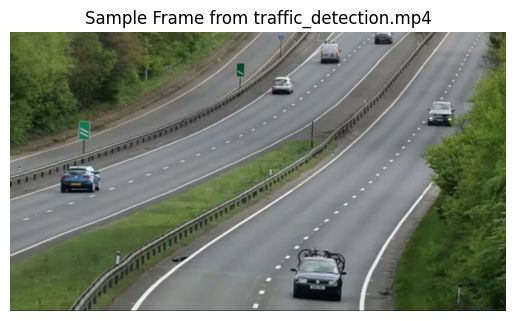

In [5]:
import matplotlib.pyplot as plt

frames = []
for i in range(10):
    ret, frame = cap.read()
    if not ret:
        break
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(frame_rgb)

# Show the first frame
plt.imshow(frames[0])
plt.axis("off")
plt.title("Sample Frame from traffic_detection.mp4")
plt.show()
cap.release()


## Video Preprocessing

Preprocess the video data for analysis. Techniques include:

Frame extraction
Resizing and normalization
Noise reduction
Mini-task:
Extract and preprocess a few frames from the video.

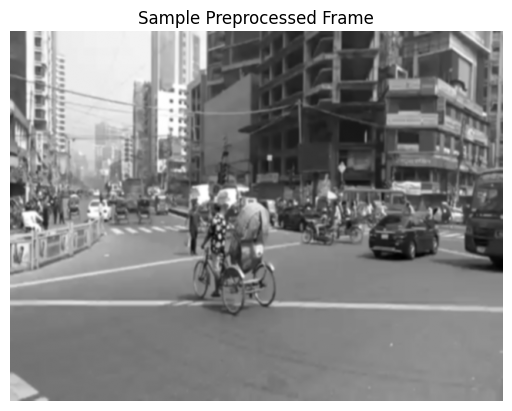

In [13]:
import cv2
import matplotlib.pyplot as plt

# Function to preprocess each frame
def preprocess_frame(frame):
    frame = cv2.resize(frame, (640, 480))  # Resize
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    frame = cv2.GaussianBlur(frame, (5, 5), 0)  # Reduce noise
    frame = frame / 255.0  # Normalize pixel values to [0, 1]
    return frame

# Open video source
cap = cv2.VideoCapture('dhaka_traffic.mp4')  # Replace with your video file or 0 for webcam

frames = []
for i in range(10):  # Extract first 10 frames
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(preprocess_frame(frame))

cap.release()

# Display a sample preprocessed frame
plt.imshow(frames[0], cmap='gray')
plt.axis('off')
plt.title('Sample Preprocessed Frame')
plt.show()


### Feature Engineering
Task:
Extract features from the video data for analysis. Techniques include:

Vehicle detection using YOLO
Traffic density estimation
Vehicle tracking

Mini-task:
Perform vehicle detection using a pre-trained YOLO model.

In [15]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [19]:
import cv2
from ultralytics import YOLO
import os

# Load YOLOv8 model
model = YOLO('yolov8n.pt')

# Your video files
video_files = [
    "british_highway_traffic.mp4",
    "dhaka_traffic.mp4",
    "road_trafifc.mp4",
    "traffic_detection.mp4",
    "traffic_video.avi"
]

vehicle_counts = []

for video in video_files:
    cap = cv2.VideoCapture(video)
    frame_index = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Sample every 10th frame to avoid overload
        if frame_index % 10 == 0:
            results = model(frame, verbose=False)
            count = len(results[0].boxes)  # Count detected objects
            vehicle_counts.append(count)

        frame_index += 1

    cap.release()



###  Model Training and Analysis
Task:
Train a model to analyze traffic patterns, such as predicting traffic density or detecting anomalies. Use classical machine learning models or deep learning models.

Mini-task:

Train a simple model to classify traffic density (low, medium, high) based on vehicle counts.

In [20]:
import numpy as np

X = np.array(vehicle_counts).reshape(-1, 1)
y = np.where(X < 10, 0, np.where(X < 20, 1, 2)).flatten()


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))



Model Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        63
      Medium       1.00      1.00      1.00        75
        High       1.00      1.00      1.00         3

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


###  Deployment and Visualization
Task:

Deploy the traffic monitoring system and visualize the results in real-time. Use tools like OpenCV for real-time visualization.

Mini-task:

Create a real-time traffic monitoring dashboard using OpenCV.

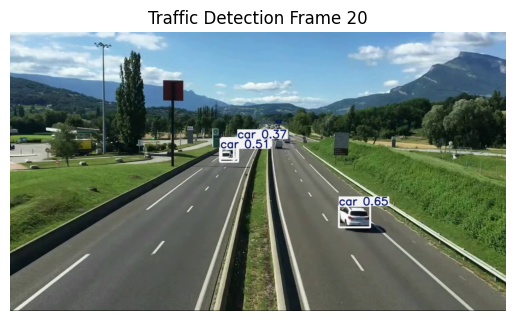

In [30]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Load model
model = YOLO('yolov8n.pt')

# Load video — make sure the path is correct
cap = cv2.VideoCapture('traffic_video.avi')  # Replace with your actual file

# Initialize frame counter
frame_count = 0
max_frames = 20  # Show only first 20 frames

while cap.isOpened() and frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        print("No frame captured. Exiting...")
        break

    # Run detection
    results = model(frame)
    annotated_frame = results[0].plot()

    # Convert to RGB for display
    rgb_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

    # Display using matplotlib (clearing previous frame)
    clear_output(wait=True)
    plt.imshow(rgb_frame)
    plt.axis('off')
    plt.title(f'Traffic Detection Frame {frame_count+1}')
    display(plt.gcf())
    plt.close()

    frame_count += 1

cap.release()


# Initialize frame counter
frame_count = 0
max_frames = 20  # Show only first 20 frames

while cap.isOpened() and frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        print("No frame captured. Exiting...")
        break

    # Run detection
    results = model(frame)
    annotated_frame = results[0].plot()

    # Convert to RGB for display
    rgb_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

    # Display using matplotlib (clearing previous frame)
    clear_output(wait=True)
    plt.imshow(rgb_frame)
    plt.axis('off')
    plt.title(f'Traffic Detection Frame {frame_count+1}')
    display(plt.gcf())
    plt.close()

    frame_count += 1

cap.release()


### Anomaly Detection

Task: Detect unusual traffic behaviors such as:

Sudden congestion

Accidents (e.g., vehicle stops for too long)

Unusual vehicle count spikes

Approach:

Use statistical methods (e.g., Z-score, IQR) or machine learning (e.g., Isolation Forest).

Set a threshold for normal traffic density, detect deviations.

In [32]:
from sklearn.ensemble import IsolationForest
import numpy as np


X = np.array(vehicle_counts).reshape(-1, 1)
model = IsolationForest(contamination=0.1)
model.fit(X)

# Predict anomalies (-1 = anomaly, 1 = normal)
anomalies = model.predict(X)

# Print out detected anomalies
for i, status in enumerate(anomalies):
    if status == -1:
        print(f"Anomaly detected at frame {i}, count = {X[i][0]}")


Anomaly detected at frame 46, count = 16
Anomaly detected at frame 59, count = 16
Anomaly detected at frame 127, count = 16
Anomaly detected at frame 131, count = 16
Anomaly detected at frame 155, count = 16
Anomaly detected at frame 179, count = 16
Anomaly detected at frame 273, count = 16
Anomaly detected at frame 300, count = 22
Anomaly detected at frame 302, count = 19
Anomaly detected at frame 303, count = 21
Anomaly detected at frame 305, count = 22
Anomaly detected at frame 325, count = 16
Anomaly detected at frame 333, count = 20
Anomaly detected at frame 336, count = 21
Anomaly detected at frame 342, count = 23
Anomaly detected at frame 343, count = 16
Anomaly detected at frame 345, count = 19
Anomaly detected at frame 349, count = 22
Anomaly detected at frame 355, count = 16
Anomaly detected at frame 358, count = 20
Anomaly detected at frame 359, count = 16
Anomaly detected at frame 360, count = 22
Anomaly detected at frame 362, count = 21
Anomaly detected at frame 364, count

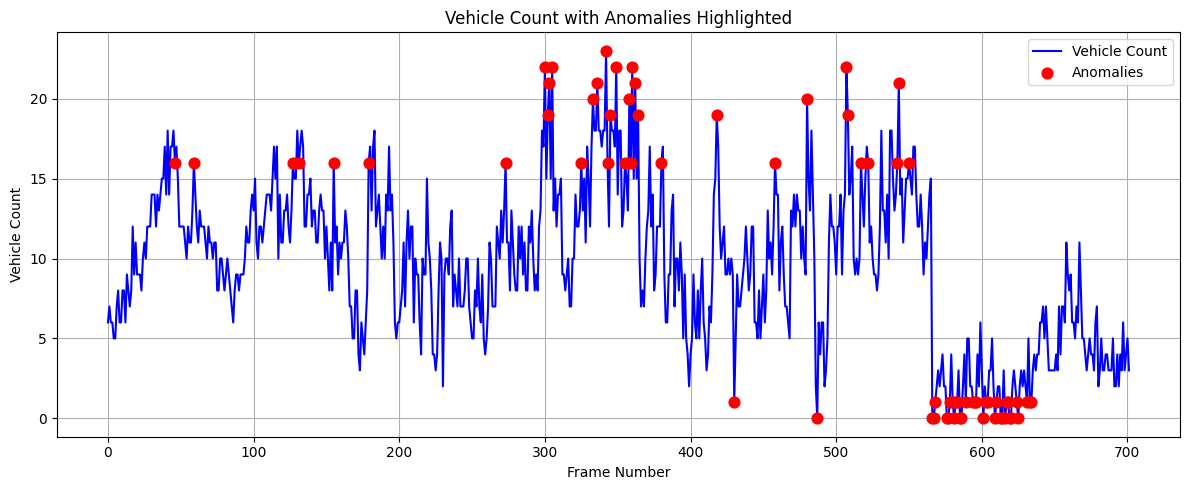

In [33]:

import numpy as np

# X is your vehicle count array
vehicle_counts = X.flatten()
frame_indices = np.arange(len(vehicle_counts))

# Get anomaly points
anomalies = model.predict(X)
anomaly_indices = frame_indices[anomalies == -1]
anomaly_counts = vehicle_counts[anomalies == -1]

# Plot all vehicle counts
plt.figure(figsize=(12, 5))
plt.plot(frame_indices, vehicle_counts, label='Vehicle Count', color='blue')

# Highlight anomalies
plt.scatter(anomaly_indices, anomaly_counts, color='red', label='Anomalies', s=60, zorder=5)

# Decorations
plt.title('Vehicle Count with Anomalies Highlighted')
plt.xlabel('Frame Number')
plt.ylabel('Vehicle Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Traffic Flow Prediction (Time Series)
Task: Predict future traffic density using historical data.

Approach:

Use time series models Prophet

Forecast future vehicle counts per minute/hour.

In [34]:
!pip install prophet


In [35]:
import pandas as pd
from prophet import Prophet

# Convert vehicle counts to DataFrame with time index
df = pd.DataFrame({
    'ds': pd.date_range(start='2025-01-01', periods=len(vehicle_counts), freq='min'),  # or 's' for seconds
    'y': vehicle_counts
})


In [36]:
# Initialize and fit model
model_t = Prophet()
model_t.fit(df)

# Future dataframe (e.g., next 5 minutes)
future = model_t.make_future_dataframe(periods=5, freq='min')  # Adjust freq if needed

# Forecast
forecast = model_t.predict(future)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7e9y0c5w/_z_njw2_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7e9y0c5w/9n56rpr7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12641', 'data', 'file=/tmp/tmp7e9y0c5w/_z_njw2_.json', 'init=/tmp/tmp7e9y0c5w/9n56rpr7.json', 'output', 'file=/tmp/tmp7e9y0c5w/prophet_modeljewc3o9q/prophet_model-20250714203351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:33:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:33:51 - cmdstanpy - INFO - Chain

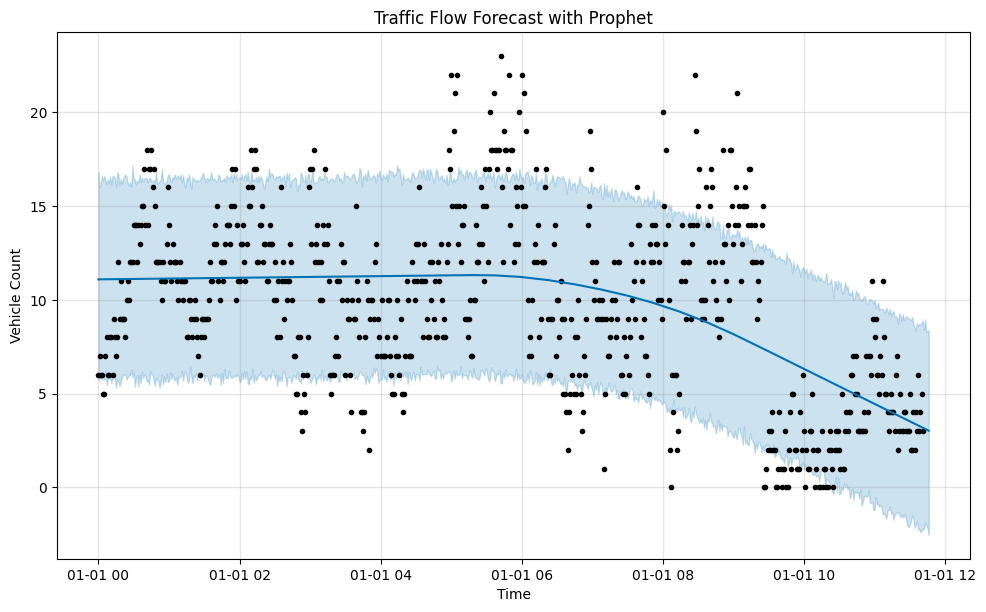

In [37]:
# Plot forecast with Prophet's built-in plot function
fig = model_t.plot(forecast)
plt.title("Traffic Flow Forecast with Prophet")
plt.xlabel("Time")
plt.ylabel("Vehicle Count")
plt.show()


In [38]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


,ds,yhat,yhat_lower,yhat_upper
697,2025-01-01 11:37:00,3.305458,-2.259584,8.623797
698,2025-01-01 11:38:00,3.274397,-2.195580,8.690198
699,2025-01-01 11:39:00,3.243335,-2.395856,8.702486
700,2025-01-01 11:40:00,3.212274,-2.298146,8.805000
701,2025-01-01 11:41:00,3.181212,-2.200675,8.875322
702,2025-01-01 11:42:00,3.150151,-2.207800,8.410045
703,2025-01-01 11:43:00,3.119090,-1.882509,8.963610
704,2025-01-01 11:44:00,3.088028,-2.028466,8.278594
705,2025-01-01 11:45:00,3.056967,-2.170153,8.319260
706,2025-01-01 11:46:00,3.025905,-2.522248,8.382353


### IoT Device Integration
Task: Collect live data from road-side cameras, sensors, or Raspberry Pi devices.

Approach:

Use IoT devices to capture video/data and send it via MQTT, HTTP, or WebSocket.

Process video at the edge or transmit to the server for central analysis.

In [41]:
VIDEO_PATH = 'traffic_video.avi'  # Replace with your uploaded filename


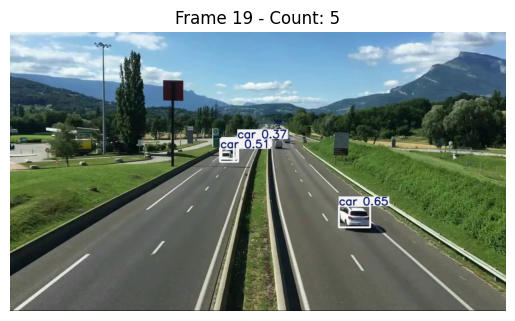

In [42]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
from IPython.display import Audio, display, clear_output

# Define alert beep for Colab
def play_alert():
    display(Audio('https://www.soundjay.com/button/sounds/beep-07.mp3', autoplay=True))

# Load YOLO model
model = YOLO('yolov8n.pt')

# Threshold for congestion anomaly
ANOMALY_THRESHOLD = 25

# Load video
cap = cv2.VideoCapture(VIDEO_PATH)

frame_count = 0
MAX_FRAMES = 20  # Limit frames for testing in Colab

while cap.isOpened() and frame_count < MAX_FRAMES:
    ret, frame = cap.read()
    if not ret:
        print("No frame captured. Exiting...")
        break

    # Run vehicle detection
    results = model(frame)
    annotated_frame = results[0].plot()

    # Get vehicle count
    vehicle_count = len(results[0].boxes)

    # Display warning if traffic is high
    if vehicle_count > ANOMALY_THRESHOLD:
        print(f"⚠️ Anomaly detected at frame {frame_count}: {vehicle_count} vehicles")
        play_alert()

    # Display frame using matplotlib
    rgb_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
    clear_output(wait=True)
    plt.imshow(rgb_frame)
    plt.title(f"Frame {frame_count} - Count: {vehicle_count}")
    plt.axis('off')
    plt.show()

    frame_count += 1

cap.release()
